In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px

In [3]:
df=pd.read_csv("/kaggle/input/berkshire-hathaway-stock-price-data/berkshire_hathaway_data.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,151.500000,151.600006,148.500000,149.169998,149.169998,3436400
1,2015-01-05,148.809998,149.000000,146.779999,147.000000,147.000000,4168800
2,2015-01-06,147.639999,148.529999,146.110001,146.839996,146.839996,4116100
3,2015-01-07,147.940002,149.139999,147.649994,148.880005,148.880005,4159100
4,2015-01-08,150.600006,151.369995,150.509995,151.369995,151.369995,4282100
...,...,...,...,...,...,...,...
2403,2024-07-23,437.339996,437.920013,433.470001,434.010010,434.010010,2393000
2404,2024-07-24,433.989990,435.410004,430.730011,432.799988,432.799988,3143700
2405,2024-07-25,431.600006,439.630005,431.600006,433.290009,433.290009,3334300
2406,2024-07-26,435.660004,439.000000,434.100006,437.660004,437.660004,2717600


In [8]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [11]:
new_df=df.drop(columns=["Date"])
new_df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,151.500000,151.600006,148.500000,149.169998,149.169998,3436400,2015,1,2
1,148.809998,149.000000,146.779999,147.000000,147.000000,4168800,2015,1,5
2,147.639999,148.529999,146.110001,146.839996,146.839996,4116100,2015,1,6
3,147.940002,149.139999,147.649994,148.880005,148.880005,4159100,2015,1,7
4,150.600006,151.369995,150.509995,151.369995,151.369995,4282100,2015,1,8
...,...,...,...,...,...,...,...,...,...
2403,437.339996,437.920013,433.470001,434.010010,434.010010,2393000,2024,7,23
2404,433.989990,435.410004,430.730011,432.799988,432.799988,3143700,2024,7,24
2405,431.600006,439.630005,431.600006,433.290009,433.290009,3334300,2024,7,25
2406,435.660004,439.000000,434.100006,437.660004,437.660004,2717600,2024,7,26


In [12]:
X=new_df.drop(columns=["Close"])
Y=new_df[["Close"]]

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
random_reg=RandomForestRegressor(n_estimators=50)
random_reg.fit(X_train,Y_train)
random_reg.score(X_test,Y_test)

/tmp/ipykernel_33/3079594239.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_reg.fit(X_train,Y_train)


0.9999702860195974

In [18]:
y_pred=random_reg.predict(X_test)

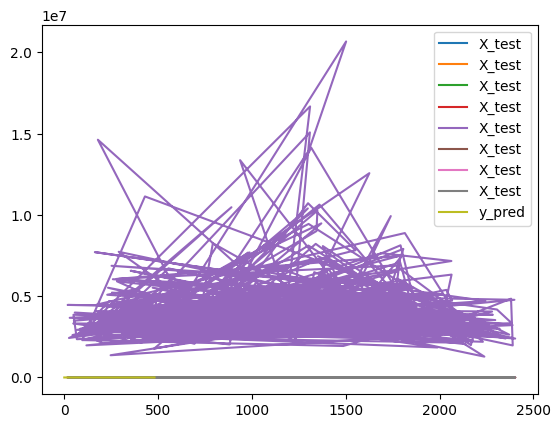

In [30]:
plt.plot(X_test,label="X_test")
plt.plot(y_pred,label="y_pred")
plt.legend()
plt.show()

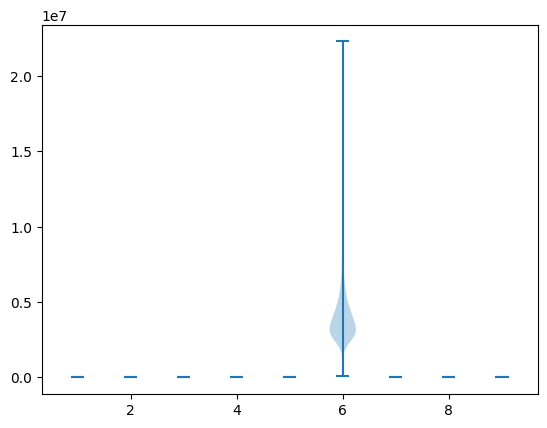

In [46]:
plt.violinplot(new_df)
plt.show()

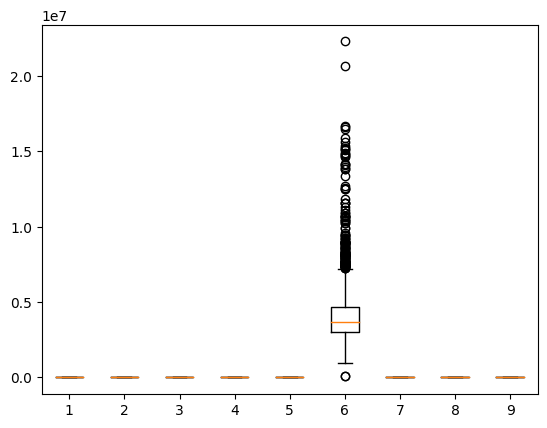

In [48]:
plt.boxplot(new_df)
plt.show()